In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from classifier import MLPBinary
import utils

In [ ]:
# resizing of the data created with monte carlo

lt, ut, t_step = 1.0, 3.2, 0.003

#for L in [10, 15, 20]:
 #   utils.resize_data(L, lt, ut)
    
utils.resize_data_test(10)

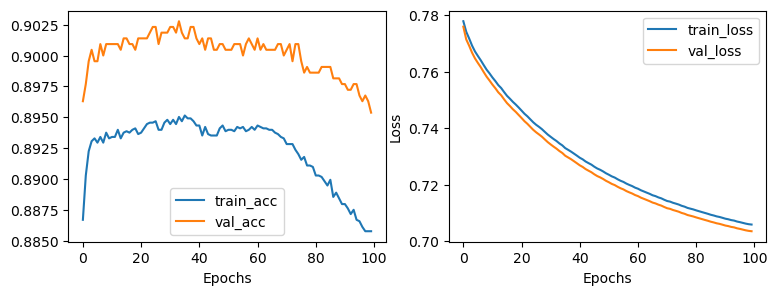

In [109]:
# CLASSIFIER TRAINING
data_train, t_train, data_val, t_val, data_test, t_test = utils.load_train_data(10, mode = 'all')

clf = MLPBinary(dim_hidden=100, tolerance=1e-5, activation='relu', lr=0.01, batch_size=200, momentum=0.9, solver='sgd', alpha=0.1, power_t=0.3, n_epochs_no_update=5)
clf.fit(data_train, t_train, X_val=data_val, t_val=t_val)

# plotting accuracy and loss
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,3))
E = len(clf.train_acc) 
ax1.plot(np.arange(E), clf.train_acc)
ax1.plot(np.arange(E), clf.val_acc)
ax1.legend(["train_acc", "val_acc"])

ax2.plot(np.arange(E), clf.train_loss)
ax2.plot(np.arange(E), clf.val_loss)
ax2.set_ylabel("Loss"), ax2.set_xlabel("Accuracy")
ax1.set_xlabel("Epochs"), ax2.set_xlabel("Epochs")
ax2.legend(["train_loss", "val_loss"])

In [6]:
clf.score(data_train, t_train)

0.5029465663580247

In [5]:
b = clf.weights2.flatten()
b @ b.T

6.746476036426959

In [38]:
for i in range(10):
    print(clf.score(data_test[i], t_test[5]))

0.875
0.875
0.9166666666666666
0.7916666666666666
0.8333333333333334
0.875
0.875
0.875
0.7916666666666666
0.875


In [112]:
t_test.shape

(10, 24)

In [125]:
# accuracy test on data w/wo 
# loading data for testing
L = 10
T_CRIT = 2.2691853
data_test = np.load(f"./data/{L}_test.npy").reshape(-1, L*L)
temp_test = np.load(f"./data/{L}_test_temp.npy").reshape(-1,)

t_test = (temp_test > T_CRIT).astype(int)

    
# sort data into ascending order according to temperatures
# potrei metterlo in utils
min_bound = 1.9
max_bound = 2.5

mask = (temp_test > max_bound) | (temp_test < min_bound)   

print(f"Outer data accuracy: {clf.score(data_test[mask], t_test[mask])}")
print(f"Inner data accuracy: {clf.score(data_test[~mask], t_test[~mask])}")


Outer data accuracy: 0.9470588235294117
Inner data accuracy: 0.8


In [121]:
data_test.shape

(10, 24, 100)

In [116]:
print(clf.score(data_M_null, t_M_null))
print(clf.score(data_M_pos, t_M_pos))
print(clf.score(data_M_neg, t_M_neg))

0.8090909090909091
0.9850746268656716
0.9841269841269841


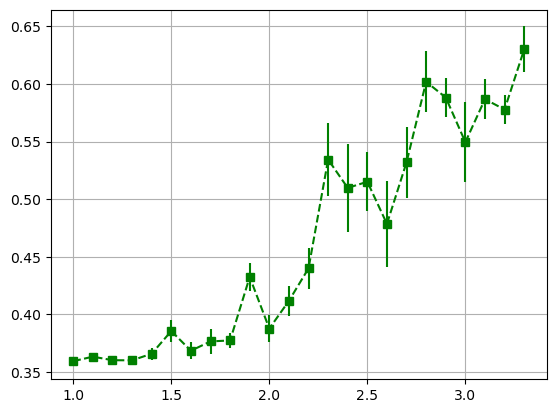

In [ ]:
# PREDICTION ON DATA SET to have mean
flattened = data_test.reshape(-1, L*L)
y = clf.predict_probabilities(flattened).reshape(10, 24, 1)
errors = y[:,:,0].std(axis=0) / np.sqrt(10)
plt.errorbar(temp_test[3], y[:,:,0].mean(axis=0), errors, fmt='s--g')
plt.grid(True)


## Accuracy vs layer size

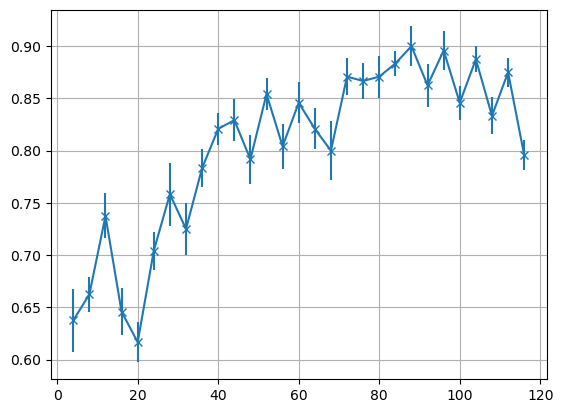

In [51]:
import pandas as pd
df = pd.read_csv("accuracy - dimensions.csv")
x = df['dim_hidden']
y = df['acc mean']
err = df['acc std']

plt.errorbar(x, y, err, marker='x')
plt.grid(True)

### Training con differenti magnetitzzazioni

In [ ]:
L= 10
T_CRIT = 2.2691853 # k_b * T_C / J  with k_b=1, J = interaction constant
data = np.load(f"data/{L}_test_tanti.npy").reshape(-1, 100)
temp = np.load(f"data/{L}_temp_tanti.npy").reshape(-1,)
n = data.shape[0]
# target value
t = (temp > T_CRIT).astype(int)
#plt.plot(temp, a, linestyle='none', marker='x')

mask = ((temp < T_CRIT) & (np.sum(data, axis=1) > 0)) # mask for positive M and t < T_crit
data_M_pos = data[mask]
t_M_pos = t[mask]

mask = ((temp < T_CRIT) & (np.sum(data, axis=1) < 0)) # mask for negative M and t < T_crit
data_M_neg = data[mask]
t_M_neg = t[mask]

data_M_null = data[temp > T_CRIT]
t_M_null = t[temp > T_CRIT]

In [95]:
A = 2730
a, b, c = 0, int(0.5*A), int(1.25*A)
z = np.concatenate((data_M_pos, data_M_neg[:b], data_M_null[:c]))
zz = np.concatenate((t_M_pos, t_M_neg[:b], t_M_null[:c]))
data_val = data_M_neg
t_val = t_M_neg

data_train, t_train, _, _ = utils.get_training_data(z, zz, 0)


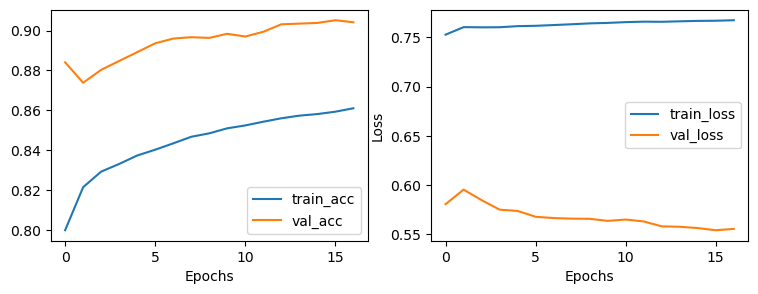

In [96]:
clf = MLPBinary(dim_hidden=100, tolerance=1e-4, activation='relu', lr=0.01, batch_size=200, momentum=0.8, solver='sgd', alpha=0.1, power_t=0.3, n_epochs_no_update=5)
clf.fit(data_train, t_train, X_val=data_val, t_val=t_val)

#clf = MLPClassifier(activation='relu', batch_size=200, momentum=0.8, solver='sgd', alpha=0)
#clf.fit(data_train, t_train)

# plotting accuracy and loss
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,3))

E = len(clf.train_acc) 
ax1.plot(np.arange(E), clf.train_acc)
ax1.plot(np.arange(E), clf.val_acc)
ax1.legend(["train_acc", "val_acc"])

ax2.plot(np.arange(E), clf.train_loss)
ax2.plot(np.arange(E), clf.val_loss)
ax2.set_ylabel("Loss"), ax2.set_xlabel("Accuracy")
ax1.set_xlabel("Epochs"), ax2.set_xlabel("Epochs")
ax2.legend(["train_loss", "val_loss"])

In [97]:

clf.score(data_M_null, t_M_null)

0.7469572045543778

In [98]:
clf.score(data_M_pos, t_M_pos)

0.9819624819624819

In [99]:
clf.score(data_M_neg, t_M_neg)

0.9041936583702693

## SKLEARN

c:\Users\CrisMattGiov\miniconda3\envs\in3050\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


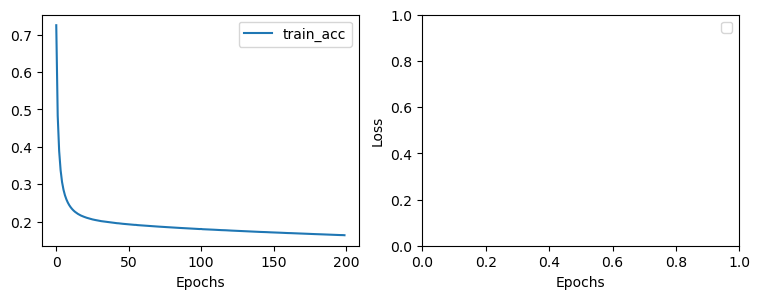

In [104]:
# training with sklearn

# using skleanr
clf = MLPClassifier(activation='relu', solver='sgd',alpha=0, momentum=0.9, nesterovs_momentum=False,  verbose=False)
clf.fit(data_train, t_train)

# plotting accuracy and loss
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(9,3))


E = len(clf.loss_curve_) 
ax1.plot(np.arange(E), clf.loss_curve_)

ax1.legend(["train_acc", "val_acc"])

ax2.set_ylabel("Loss"), ax2.set_xlabel("Accuracy")
ax1.set_xlabel("Epochs"), ax2.set_xlabel("Epochs")
ax2.legend(["train_loss", "val_loss"])


(array([1., 2., 2., 4., 2., 4., 5., 6., 1., 7., 5., 2., 2., 4., 2., 1., 5.,
        4., 4., 2., 4., 8., 2., 5., 5., 4., 4., 2., 0., 1.]),
 array([-0.32493354, -0.29496952, -0.2650055 , -0.23504148, -0.20507746,
        -0.17511344, -0.14514942, -0.11518541, -0.08522139, -0.05525737,
        -0.02529335,  0.00467067,  0.03463469,  0.06459871,  0.09456273,
         0.12452675,  0.15449077,  0.18445479,  0.21441881,  0.24438283,
         0.27434685,  0.30431086,  0.33427488,  0.3642389 ,  0.39420292,
         0.42416694,  0.45413096,  0.48409498,  0.514059  ,  0.54402302,
         0.57398704]),
 <BarContainer object of 30 artists>)

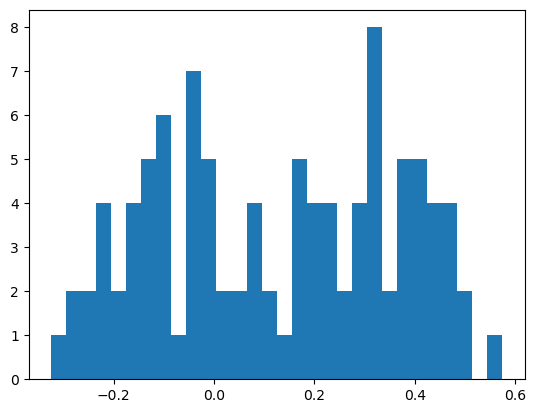

In [107]:
a = clf.coefs_[1].flatten()
n_bins = 30
plt.hist(a, n_bins)

In [14]:
min(clf.loss_curve_)

0.1634691189926141

In [8]:
clf.score(data_test[4], t_test[0])

1.0

In [9]:
# PREDICTION ON DATA SET to have mean
flattened = data_test.reshape(-1, L*L)
y = clf.predict_proba(flattened).reshape(10, 24, 2)

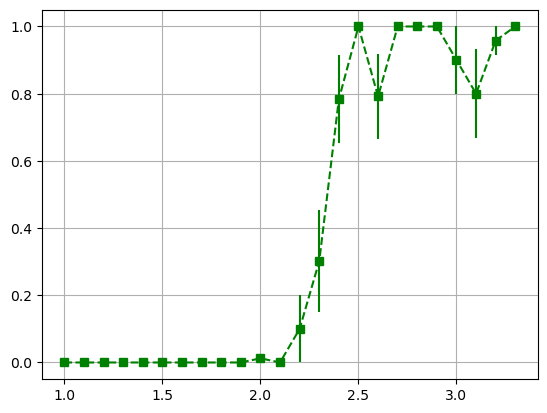

In [15]:
train_size = 10
errors = y[:,:,0].std(axis=0, ddof=1) / np.sqrt(train_size)  # std/(N-1)
plt.errorbar(temp_test[3], y[:,:,0].mean(axis=0), errors, fmt='s--g')
plt.grid(True)

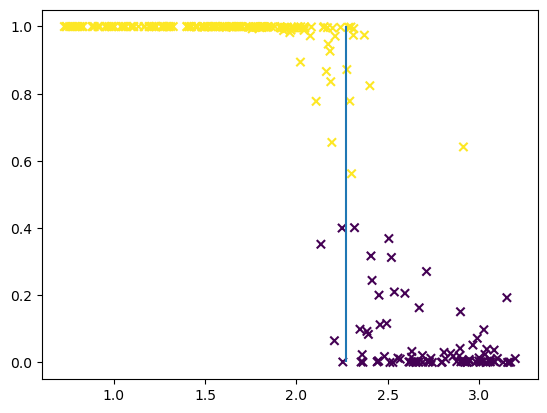

In [ ]:
out = clf.predict_proba(data_val)
plt.scatter(temp[a:], out[:,1], marker='x', c=clf.predict(data_val) )
plt.vlines(T_CRIT, 0, 1)